# Indeed Job **Scraper**
WIP

I found it inefficient to manually sort through job descriptions.

Scraping data from websites can be a useful way to gather information for a variety of purposes. For example, you might want to scrape job listings from a job search website like Indeed to analyze the job market in your area, or to build a database of job openings for your own purposes.

One way to do this is to use a web scraper to extract the data from the website and save it to a CSV (comma-separated values) file. It allows you to extract large amounts of data quickly and easily and can be shared with others. It also can be used for parsing specific information out of job descriptions such as years of experience being asked for. 

In [1]:
import requests
import csv
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['Title', 'Description', 'Link'])

In [3]:
APIKEY = '1081312d4de6bfa2d256048cd767a530'

HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [17]:
#url = 'https://www.indeed.com/jobs?q=data+analyst&start=10'
#with location set
Query = 'Data Analyst'
State = 'WA'
City = 'Seattle'
Radius = '50'
Search_url = f'https://www.indeed.com/jobs?q={Query}&l={City}%2C+{State}&radius={Radius}&start=10'

# l=Seattle%2C+WA&radius=50

# 'https://www.indeed.com/jobs?q=data+analyst&l=Seattle%2C+WA&radius=50&start=10'

# Individual Page Testing

In [18]:
url = 'https://www.indeed.com/jobs?q=Data+Analyst&l=Seattle%252C+WA&radius=50&start=20'
payload = {'api_key': APIKEY, 'url': url}
r = requests.get('http://api.scraperapi.com', params=payload, headers = HEADERS)
soup = BeautifulSoup(r.text, 'html.parser')

In [69]:
soup;

In [73]:
entry = soup.find_all('td', class_='resultContent')

In [74]:
#Get Job Title
for item in entry:
  item1 = item.a.span['title']
  #title = item.div.h2.a['title']
  print(item1)

Data Visualization Specialist
Growth Data Analyst
Associate Analyst, Quality Technical Data Management
Data Analyst II
Senior Data Analyst
Data Analyst - Tiktok Ads and Monetization Products
Healthcare Data Analyst - Seattle, WA - Hybrid
Principal Product Data Analyst
Senior Data Solutions Analyst, REMOTE
Senior Business Data Analyst - Remote
BUSINESS ANALYST
Data and Application Analyst
Data Analyst - General
Senior Data Analyst
Health Care Data Analyst


In [75]:
datepart = soup.find_all('tr', class_='underShelfFooter')

In [77]:
datepart;

In [108]:
#datepart = soup.find_all('tr', class_='underShelfFooter')
for item in datepart:
  print(item.select_one('.date').text.strip())

PostedPosted 30+ days ago
PostedPosted 30+ days ago
PostedPosted 30+ days ago
PostedPosted 30+ days ago
PostedJust posted
PostedPosted 30+ days ago
PostedPosted 6 days ago
PostedPosted 26 days ago
PostedPosted 12 days ago
PostedPosted 4 days ago
PostedPosted 30+ days ago
PostedPosted 14 days ago
PostedPosted 30+ days ago
PostedPosted 3 days ago
PostedPosted 30+ days ago


In [66]:
#Get Job Posted Date
postinginfo = soup.find_all

In [68]:
postinginfo;

In [10]:
# #Test on Individual Job Page
# posting = get_soup('https://www.indeed.com/jobs?q=data+analyst&start=10')
# posting
#posting_info = posting.find(class_='jobsearch-HiringInsights-entry--text').get_text()
# posting_info

In [109]:
def get_soup(url):
  payload = {'api_key': APIKEY, 'url': url}
  r = requests.get('http://api.scraperapi.com', params=payload)
  soup = BeautifulSoup(r.text, 'html.parser')
  return soup

def date_fixes(dfcopy):
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].replace({'Posted today': 1})
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].replace({'Just Posted': 1})
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].replace({'Urgently Hiring': 0})
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].str.replace(r'[^0-9]+', '')
  dfcopy['Date_Posted'] = dfcopy['Date_Posted'].fillna(-1)
  return dfcopy

In [39]:
Query = 'Data+Analyst'
State = 'WA'
City = 'Seattle'
Radius = '50'

In [ ]:
datepart = soup.find_all('tr', class_='underShelfFooter')
for item in datepart:
  item.select_one('.date').text.strip()

In [61]:
#Remove number from start Url
def get_postings(pages):
  df = pd.DataFrame(columns=['Title', 'Description', 'Link'])
  base_link = 'https://www.indeed.com'
  #Set page range
  for number in range(0,pages*10,10):
    soup = get_soup(f'https://www.indeed.com/jobs?q={Query}&l={City}%2C+{State}&radius={Radius}&start={number}')
    entry = soup.find_all('td', class_='resultContent')
    print(number)
    for item in entry:
        #Job Title

        title = item.find(class_='jobTitle').text
        print(title)
        #Get specific posting link
        link = item.a['href']
        new_link = base_link + link
        print(new_link)
        #Retrieve Job Page (single) from Link
        soup = get_soup(new_link)
        #Retrieve Description
        try:
          description = soup.find(class_='jobsearch-jobDescriptionText').get_text()
        except:
          description=''
          continue
        df.loc[len(df.index)] = [title, description, new_link]
        #Fix Dates
        #df = date_fixes(df)
  return df

In [40]:
print(f'https://www.indeed.com/jobs?q={Query}&l={City}%2C+{State}&radius={Radius}&start=10')

https://www.indeed.com/jobs?q=Data+Analyst&l=Seattle%2C+WA&radius=50&start=10


In [79]:
df1 = get_postings(1)

0
.css-jspxzf{box-sizing:border-box;margin:0;min-width:0;-webkit-text-decoration:none;text-decoration:none;color:inherit!important;position:static;}.css-jspxzf:active,.css-jspxzf:visited,.css-jspxzf:hover,.css-jspxzf:focus{-webkit-text-decoration:none;text-decoration:none;color:inherit;}.css-jspxzf:focus-visible{outline:none;}.css-jspxzf::after{content:"";position:absolute;left:0;top:0;right:0;bottom:0;}Data Analyst - Tiktok Ads
https://www.indeed.com/rc/clk?jk=ea2bf81d89f746f0&fccid=caed318a9335aac0&vjs=3
Data Analyst - Remote
https://www.indeed.com/rc/clk?jk=705c4f4ca7943248&fccid=c3123dfd9a39895a&vjs=3
Analyst, Data Operations (Seattle)
https://www.indeed.com/rc/clk?jk=143e19b8f3675108&fccid=58c732f14833248a&vjs=3
DATA ANALYST, EVALUATIONS
https://www.indeed.com/rc/clk?jk=1738ad9a1f1fa15a&fccid=142783ac2edbe56b&vjs=3
Senior Data Analyst _ Real Time Communication (Seattle, WA)
https://www.indeed.com/rc/clk?jk=5c53ee8ec8fd2fda&fccid=caed318a9335aac0&vjs=3
UCT Homelessness Data Analyst

In [85]:
print(df1.tail(1)['Description'])

39    \nResponsibilities\n Supports the Hospital and...
Name: Description, dtype: object


In [96]:
df1.to_csv('results')

# Testing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


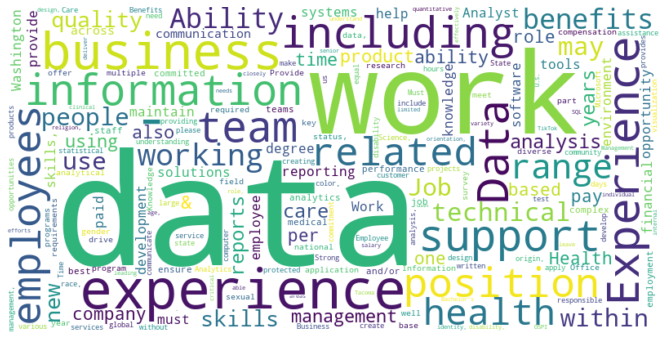

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# create the word map using the code from the previous answer
word_map = df1['Description'].str.split(expand=True).stack().value_counts().to_dict()

# remove stopwords from the word map using the English stopwords corpus
stop_words = set(stopwords.words('english'))
word_map = {word: freq for word, freq in word_map.items() if word.lower() not in stop_words}

# create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_map)

# display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
